In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


In [2]:
data=pd.read_csv("NFLX.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [4]:
data.shape

(1009, 7)

In [5]:
data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1004,31-01-2022,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,01-02-2022,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,02-02-2022,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,03-02-2022,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,04-02-2022,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [6]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,05-02-2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,06-02-2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,07-02-2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,08-02-2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,09-02-2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [7]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
data.rename(columns={
    'Date': 'Trading Date',
    'Open': 'Opening Price',
    'High': 'Highest Price',
    'Low': 'Lowest Price',
    'Close': 'Closing Price',
    'Adj Close': 'Adjusted Closing Price',
    'Volume': 'Traded Volume'
}, inplace=True)

In [9]:
data.reset_index(inplace=True)

In [10]:
data['Trading Date'] = pd.to_datetime(data['Trading Date'], format='%d-%m-%Y', errors='coerce')

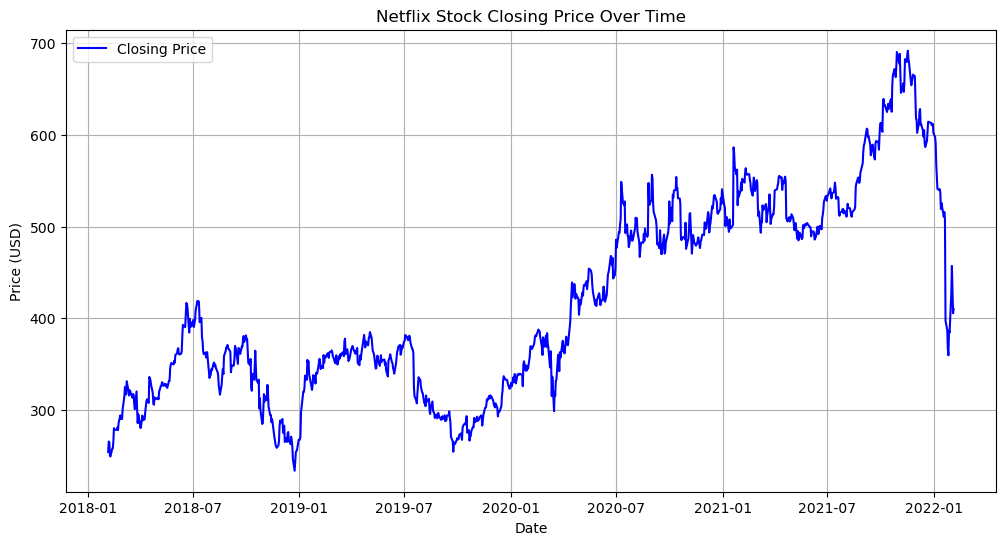

In [11]:
# Plot Closing Price over time
plt.figure(figsize=(12,6))
plt.plot(data['Trading Date'], data['Closing Price'], label='Closing Price', color='b')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Netflix Stock Closing Price Over Time')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

In [12]:
data.corr()

,index,Trading Date,Opening Price,Highest Price,Lowest Price,Closing Price,Adjusted Closing Price,Traded Volume
index,1.000000,0.999996,0.840686,0.841791,0.841000,0.841499,0.841499,-0.427534
Trading Date,0.999996,1.000000,0.840554,0.841665,0.840878,0.841384,0.841384,-0.427661
Opening Price,0.840686,0.840554,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838
Highest Price,0.841791,0.841665,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699
Lowest Price,0.841000,0.840878,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116
Closing Price,0.841499,0.841384,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Adjusted Closing Price,0.841499,0.841384,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Traded Volume,-0.427534,-0.427661,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000


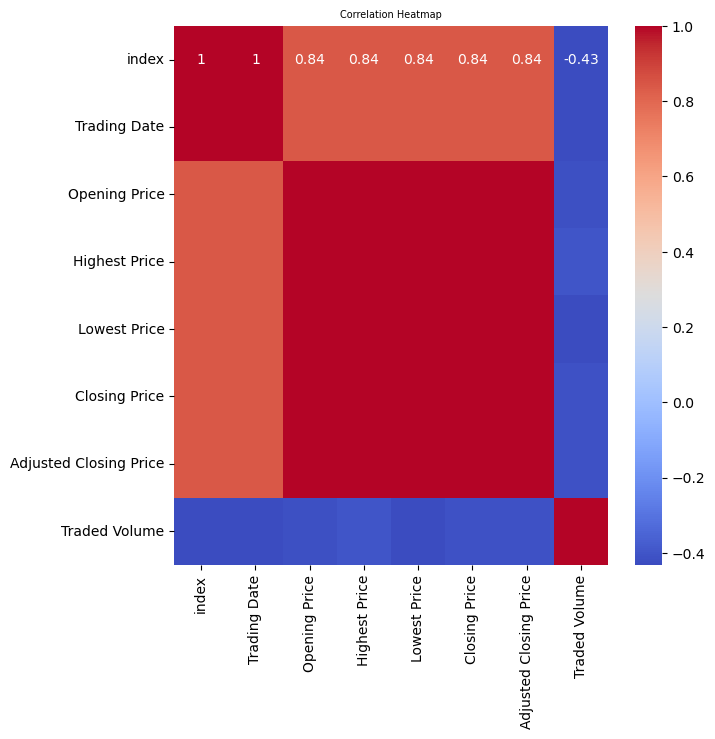

In [13]:
#corrolation heatmap
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(),annot=True, cbar=True,cmap='coolwarm')
plt.title('Correlation Heatmap', fontdict={'fontsize': 7})
plt.show()

In [14]:
X = data[['Opening Price', 'Highest Price', 'Lowest Price', 'Traded Volume']]
y = data['Closing Price']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (807, 4)
Testing set shape: (202, 4)


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled.std()

1.0

In [19]:
X_test_scaled.std()

0.971267285558647

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test)

In [22]:
r2 = r2_score(y_test, y_pred)*100

In [23]:
print(f'R² Score: {r2}')

R² Score: 99.86297713881387


In [24]:
models=[ LinearRegression(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor(random_state=42)]

In [25]:
def compare_model_train_test():
    for model in models:
        model.fit(X_train,y_train)
        test_data_prediction=model.predict(X_test)
        score=r2_score(y_test,test_data_prediction)*100
        print('r2_score of the', model,'=',score)
        
compare_model_train_test()  

r2_score of the LinearRegression() = 99.86297713881387
r2_score of the SVR() = 29.730302589612702
r2_score of the KNeighborsRegressor() = 21.58170387812113
r2_score of the DecisionTreeRegressor() = 99.58859585925069
r2_score of the RandomForestRegressor(random_state=42) = 99.76232864811463


In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the custom scoring function for regression
scoring = {'MSE': make_scorer(mean_squared_error, greater_is_better=False), 
           'MAE': make_scorer(mean_absolute_error, greater_is_better=False), 
           'R2': make_scorer(r2_score)}

def compare_model_cross_validation():
    for model in models:
        # Perform 5-fold cross-validation for each regression metric
        mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
        mae_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
        r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

        # Calculate the mean and standard deviation for each metric
        mean_mse = np.mean(-mse_scores)  # Convert to positive MSE
        mean_mae = np.mean(-mae_scores)  # Convert to positive MAE
        mean_r2 = np.mean(r2_scores)

        # Print cross-validation results
        print(f'Cross-validation for {model}')
        print(f'Mean Squared Error (MSE): {mean_mse:.4f}')
        print(f'Mean Absolute Error (MAE): {mean_mae:.4f}')
        print(f'R² Score: {mean_r2:.4f}')
        print('-----------------------------------------')

# Call the function
compare_model_cross_validation()


Cross-validation for LinearRegression()
Mean Squared Error (MSE): 15.2515
Mean Absolute Error (MAE): 2.8713
R² Score: 0.9893
-----------------------------------------
Cross-validation for SVR()
Mean Squared Error (MSE): 16366.0119
Mean Absolute Error (MAE): 111.6508
R² Score: -8.8067
-----------------------------------------
Cross-validation for KNeighborsRegressor()
Mean Squared Error (MSE): 11038.5558
Mean Absolute Error (MAE): 84.6916
R² Score: -6.5389
-----------------------------------------
Cross-validation for DecisionTreeRegressor()
Mean Squared Error (MSE): 534.3769
Mean Absolute Error (MAE): 9.2269
R² Score: 0.9004
-----------------------------------------
Cross-validation for RandomForestRegressor(random_state=42)
Mean Squared Error (MSE): 375.8963
Mean Absolute Error (MAE): 8.3659
R² Score: 0.9057
-----------------------------------------


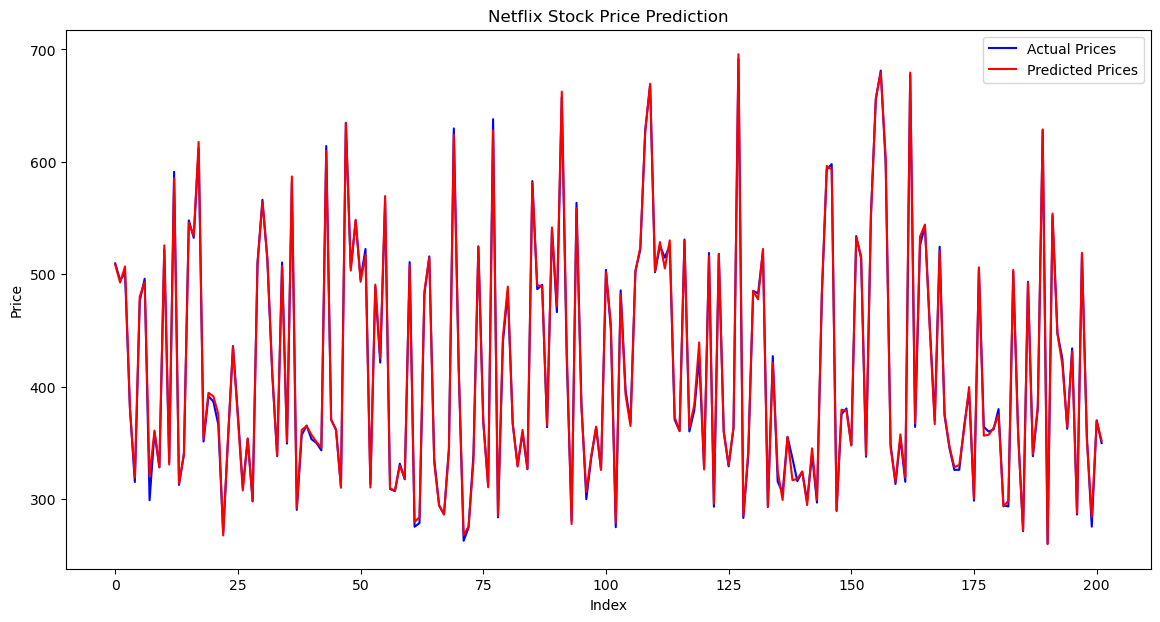

In [27]:
# Create a DataFrame for plotting
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results = results.reset_index(drop=True)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(results['Actual'].values, label='Actual Prices', color='blue')
plt.plot(results['Predicted'].values, label='Predicted Prices', color='red')
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [28]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
import pickle
from PIL import Image, ImageTk

In [29]:
filename="Untitled"
pickle.dump(model,open(filename,'wb'))
model22=pickle.load(open(filename,'rb'))

with open('model22.pkl','wb') as files:
    pickle.dump(model22,files)

with open('model22.pkl','rb') as file:
    Result=pickle.load(file)

In [30]:
def resize_image(image, max_width, max_height):
    original_width, original_height = image.size
    ratio_width = (max_width * 0.7) / original_width  # Reduce max width by 30%
    ratio_height = (max_height * 0.7) / original_height  # Reduce max height by 30%
    ratio = min(ratio_width, ratio_height)
    new_width = int(original_width * ratio)
    new_height = int(original_height * ratio)
    resized_image = image.resize((new_width, new_height), Image.LANCZOS)
    return resized_image

root = tk.Tk()
root.geometry("1920x1080")

image_path = "IMG_1376.JPG"
image = Image.open(image_path)
image = resize_image(image, 1920, 1080)
bg_image = ImageTk.PhotoImage(image)

bg_label = tk.Label(root, image=bg_image)
bg_label.place(relx=0.5, rely=0.5, anchor=tk.CENTER)

label1 = tk.Label(root, text="NETFLIX STOCK PRICE PREDICTION", fg="black", bg="white", font=("Arial", 24))
label1.pack(pady=10)

# Centralizing widgets - adjust x values
x_pos = 400  # Further adjusted value for more central placement

# Feature 1: Open Price
label2 = tk.Label(root, text="Open Price range[0--1000]:", fg="black", font=("Arial", 12))
label2.place(x=x_pos, y=100)
scale1 = tk.Scale(root, from_=0, to=1000, length=200, orient=tk.HORIZONTAL, bg="cyan", fg="black")
scale1.place(x=x_pos + 305, y=90)
scale1.set(0)

# Feature 2: High Price
label3 = tk.Label(root, text="High Price range[0--1000]:", fg="black", font=("Arial", 12))
label3.place(x=x_pos, y=150)
scale2 = tk.Scale(root, from_=0, to=1000, length=200, orient=tk.HORIZONTAL, bg="cyan", fg="black")
scale2.place(x=x_pos + 305, y=140)
scale2.set(0)

# Feature 3: Low Price
label4 = tk.Label(root, text="Low Price range[0--1000]:", fg="black", font=("Arial", 12))
label4.place(x=x_pos, y=200)
scale3 = tk.Scale(root, from_=0, to=1000, length=200, orient=tk.HORIZONTAL, bg="cyan", fg="black")
scale3.place(x=x_pos + 305, y=190)
scale3.set(0)

# Feature 4: Volume
label5 = tk.Label(root, text="Volume range[0--1,000,000,000]:", fg="black", font=("Arial", 12))
label5.place(x=x_pos, y=250)
scale4 = tk.Scale(root, from_=0, to=1000000000, length=200, orient=tk.HORIZONTAL, bg="cyan", fg="black")
scale4.place(x=x_pos + 305, y=240)
scale4.set(0)

# Predict button
button1 = tk.Button(root, text='RESULT', fg="black", command=lambda: predict(), font=("Arial", 12))
button1.place(x=500 + 150, y=300)

# Text box for displaying results
t = tk.Text(root, highlightbackground='green', fg="black", bg="white", height=5, width=40, font=("Arial", 12))
t.place(x=500, y=400)

# Reset button
button2 = tk.Button(root, text='Clear', fg="blue", command=lambda: reset(), font=("Arial", 12))
button2.place(x=500 + 160, y=500)

# Prediction function
def predict():
    try:
        open_price = float(scale1.get())
        high_price = float(scale2.get())
        low_price = float(scale3.get())
        volume = int(scale4.get())
        if not (0 <= open_price <= 1000):
            raise ValueError("'Open Price' should be between 0 and 1000")
        if not (0 <= high_price <= 1000):
            raise ValueError("'High Price' should be between 0 and 1000")
        if not (0 <= low_price <= 1000):
            raise ValueError("'Low Price' should be between 0 and 1000")
        if not (0 <= volume <= 1000000000):
            raise ValueError("'Volume' should be between 0 and 1,000,000,000")

        inp = np.array([open_price, high_price, low_price, volume])
        prediction = Result.predict(inp.reshape(1, -1))

        t.delete('1.0', 'end')
        text = f"Predicted Close Price: {prediction[0]:.2f}"
        t.insert('1.0', text)

    except ValueError as ve:
        messagebox.showerror('Error', str(ve))

# Reset function to clear all inputs
def reset():
    scale1.set(0)
    scale2.set(0)
    scale3.set(0)
    scale4.set(0)
    t.delete('1.0', 'end')

root.mainloop()


C:\Users\Roohi Afsha\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Roohi Afsha\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
